In [1]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', 23)
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train_df.shape

(1458644, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
train_df['id'].duplicated().value_counts()

False    1458644
Name: id, dtype: int64

In [9]:
train_df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [10]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])

In [11]:
train_df['pickup_day'] = train_df['pickup_datetime'].dt.day_name()
train_df['dropoff_day'] = train_df['dropoff_datetime'].dt.day_name()

In [12]:
train_df['pickup_day_weekday'] = train_df['pickup_datetime'].dt.weekday
train_df['dropoff_day_weekday'] = train_df['dropoff_datetime'].dt.weekday

In [13]:
train_df['pickup_month'] = train_df['pickup_datetime'].dt.month
train_df['dropoff_month'] = train_df['dropoff_datetime'].dt.month

In [14]:
train_df['pickup_hour'] = train_df['pickup_datetime'].dt.hour
train_df['dropoff_hour'] = train_df['dropoff_datetime'].dt.hour

In [15]:
def distance_trip(p_lat, d_lat, p_lon, d_lon):
    p_lon = radians(p_lon)
    d_lon = radians(d_lon)
    p_lat = radians(p_lat)
    d_lat = radians(d_lat)
    
    dlon = d_lon - p_lon
    dlat = d_lat - p_lat
    a = sin(dlat / 2)**2 + cos(p_lat) * cos(d_lat) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    r = 6371

    return(c * r)

In [16]:
train_df['distance'] = train_df.apply(lambda x: distance_trip(x['pickup_latitude'],
                                                         x['dropoff_latitude'],
                                                         x['pickup_longitude'],
                                                         x['dropoff_longitude']), axis=1)

In [17]:
train_df['pickup_timeofday'] = (train_df['pickup_datetime'].dt.hour % 24 + 4) // 4
train_df['pickup_timeofday'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [18]:
train_df['dropoff_timeofday'] = (train_df['dropoff_datetime'].dt.hour % 24 + 4) // 4
train_df['dropoff_timeofday'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [19]:
train_df['passenger_count'].value_counts().sort_values(ascending=False)

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

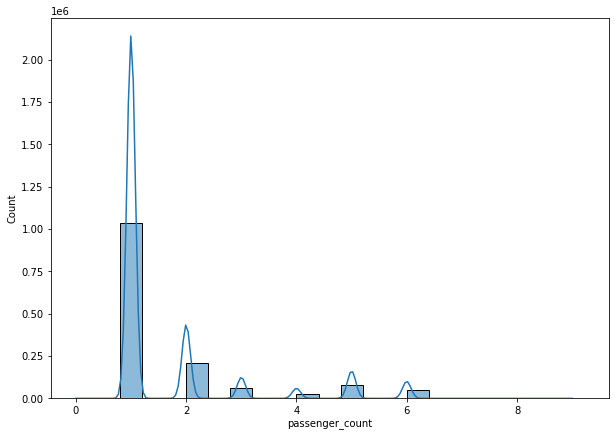

In [20]:
plt.figure(figsize=(10, 7))
sns.histplot(train_df['passenger_count'], kde=True, binwidth=0.4)
plt.show()

Most of the Passengers density lies between 1 and 2. There is two Trip with max Passengers of 7 and 9. There are 60 trips with zero passenger that means the booking might be cancelled due to some reason.

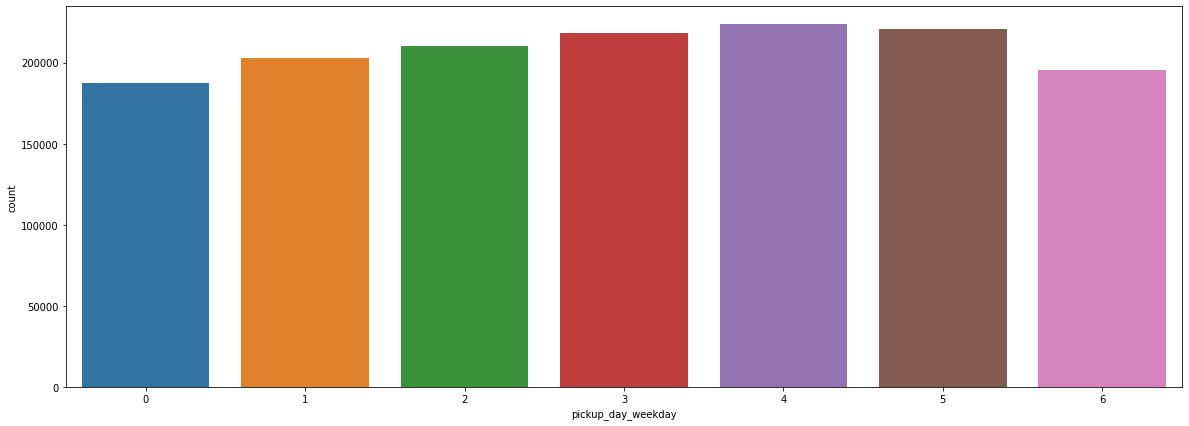

In [21]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='pickup_day_weekday')
plt.show()

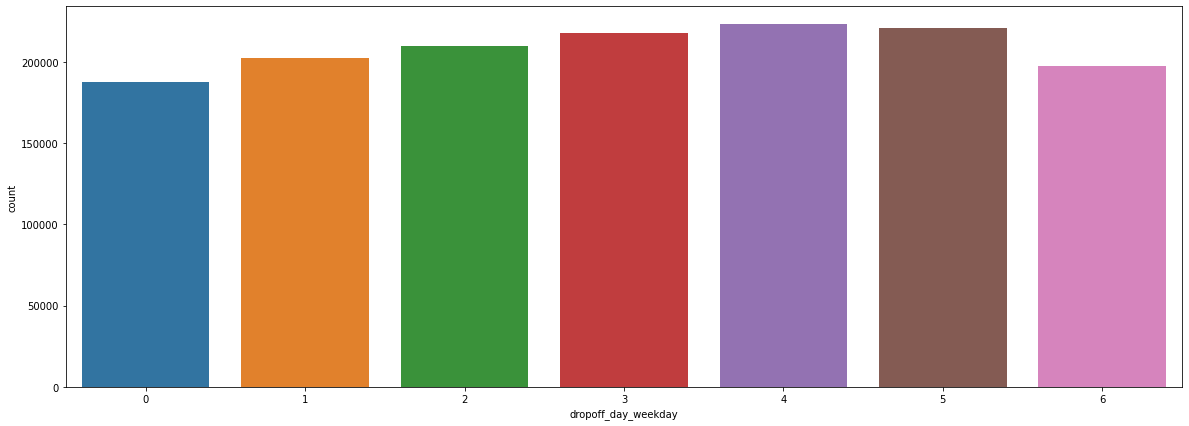

In [22]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='dropoff_day_weekday')
plt.show()

Friday is the busiest day of the week followed by Saturday, and Thursday. 

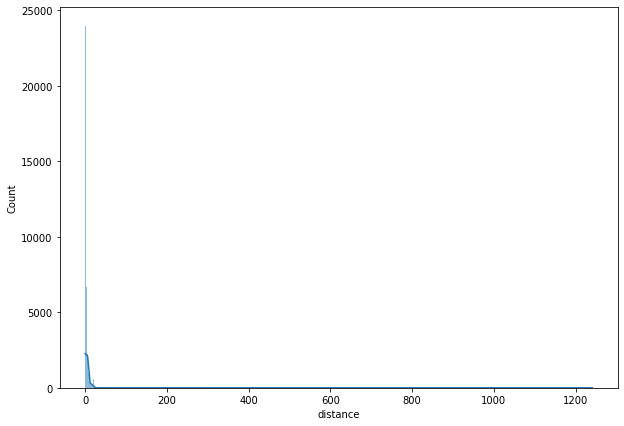

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(train_df['distance'], kde=True)
plt.show()

Distance is mostly 0

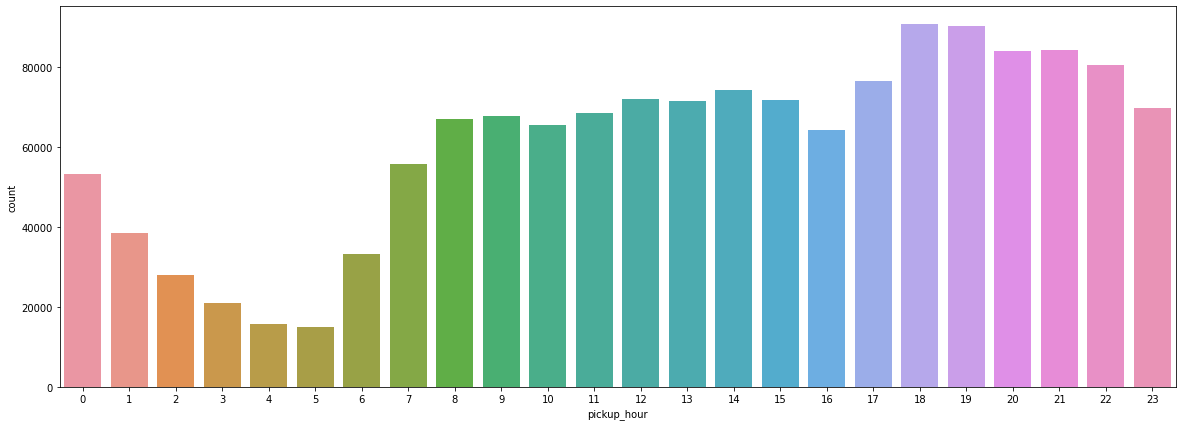

In [24]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='pickup_hour')
plt.show()

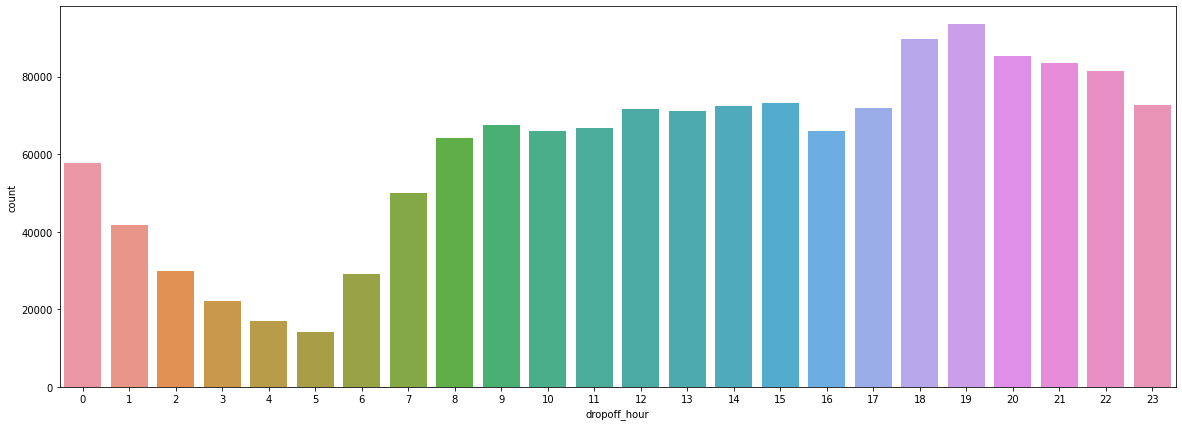

In [25]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='dropoff_hour')
plt.show()

Busy hours are 6-8 pm

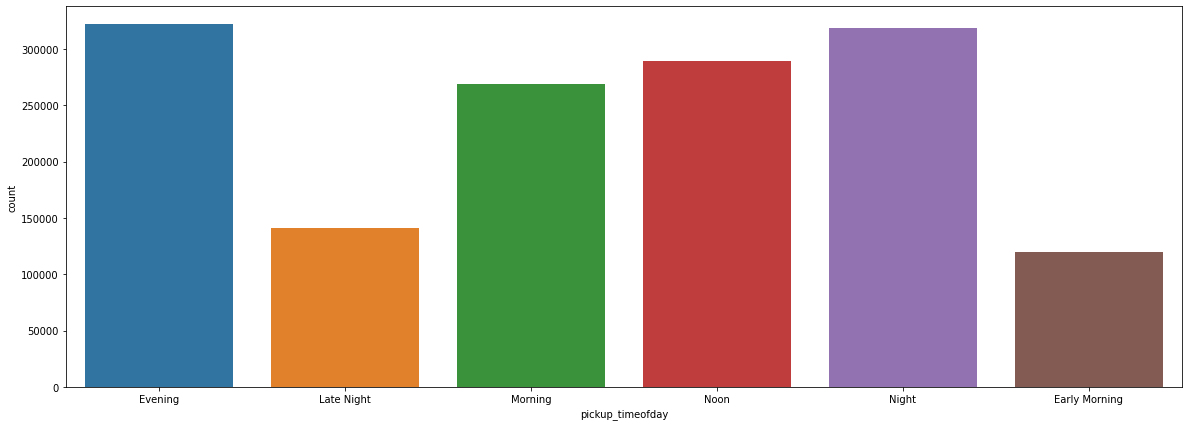

In [26]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='pickup_timeofday')
plt.show()

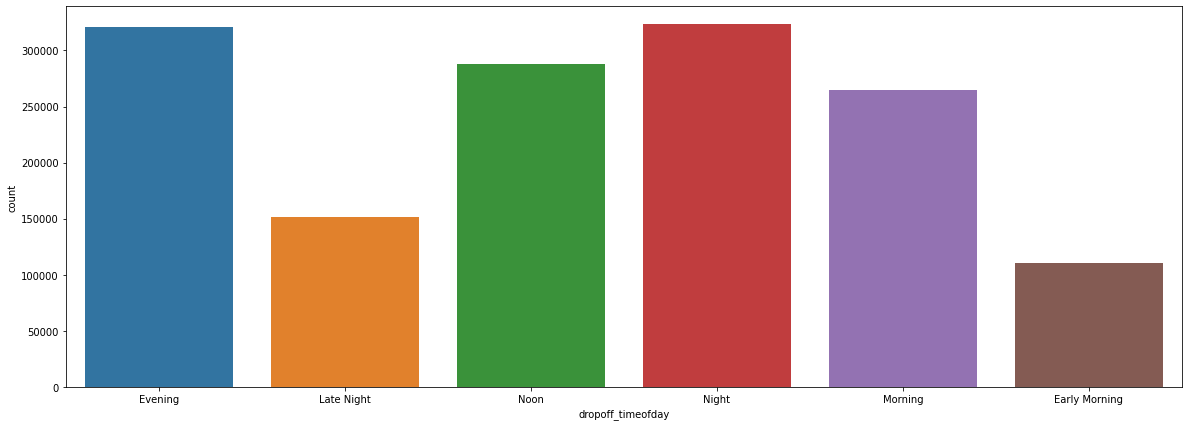

In [27]:
plt.figure(figsize=(20, 7))
sns.countplot(data=train_df, x='dropoff_timeofday')
plt.show()

Evening Time is the Busiest Time followed by Morning which make sense as Most of People have to travel to reach office in morning and evening time back to home.

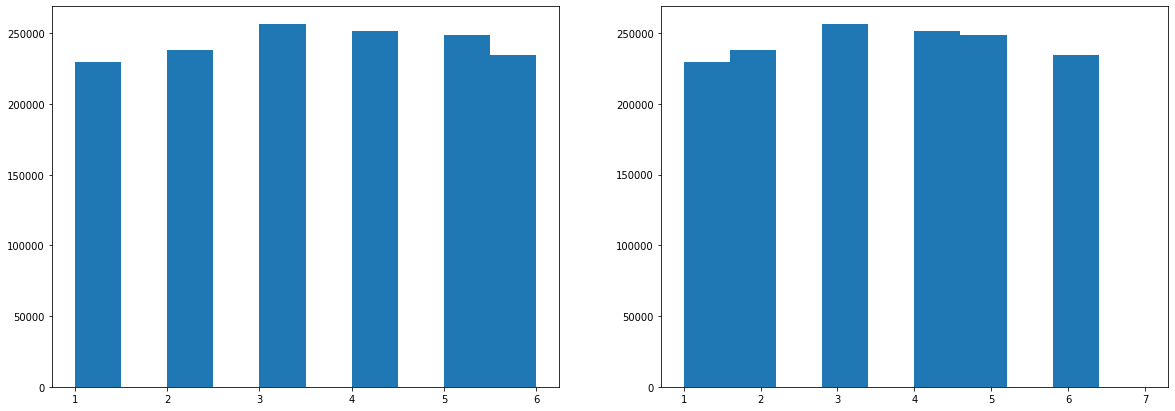

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].hist(train_df['pickup_month'])
ax[1].hist(train_df['dropoff_month'])
plt.show()

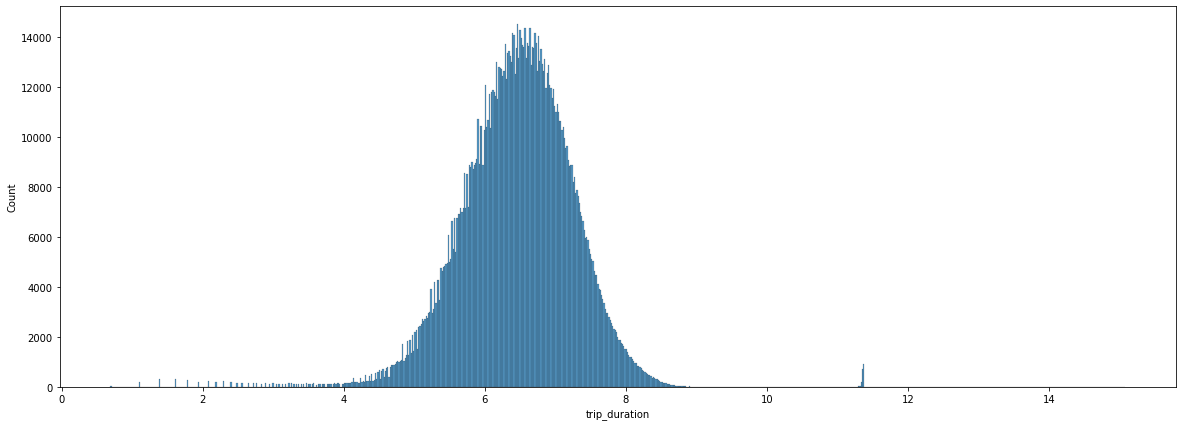

In [29]:
plt.figure(figsize=(20, 7))
sns.histplot(np.log1p(train_df['trip_duration']))
plt.show()

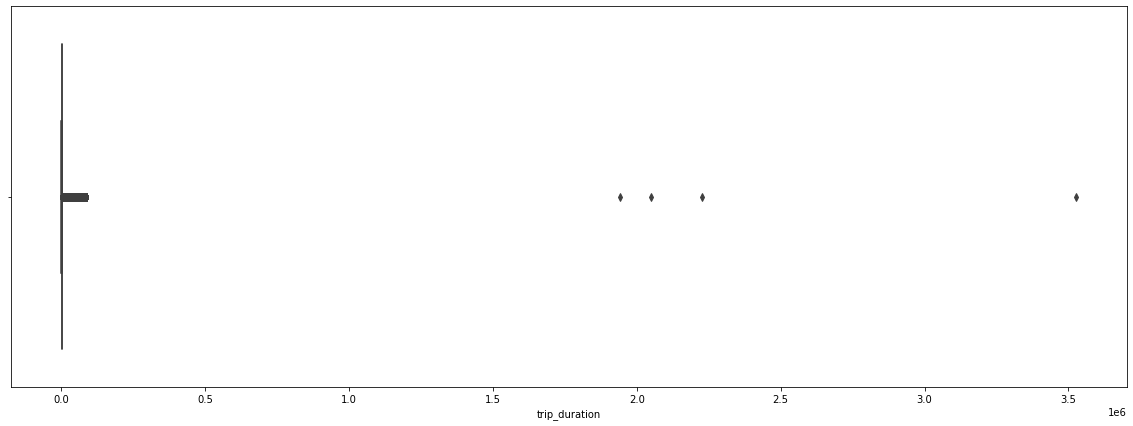

In [30]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train_df, x='trip_duration')
plt.show()

There are a few outliers we see from the above plot

In [31]:
train_df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [32]:
train_df.drop([978383, 924150, 680594, 355003], axis=0, inplace=True)

In [33]:
train_df['average_speed'] = (train_df['distance']/(train_df['trip_duration']/3600))

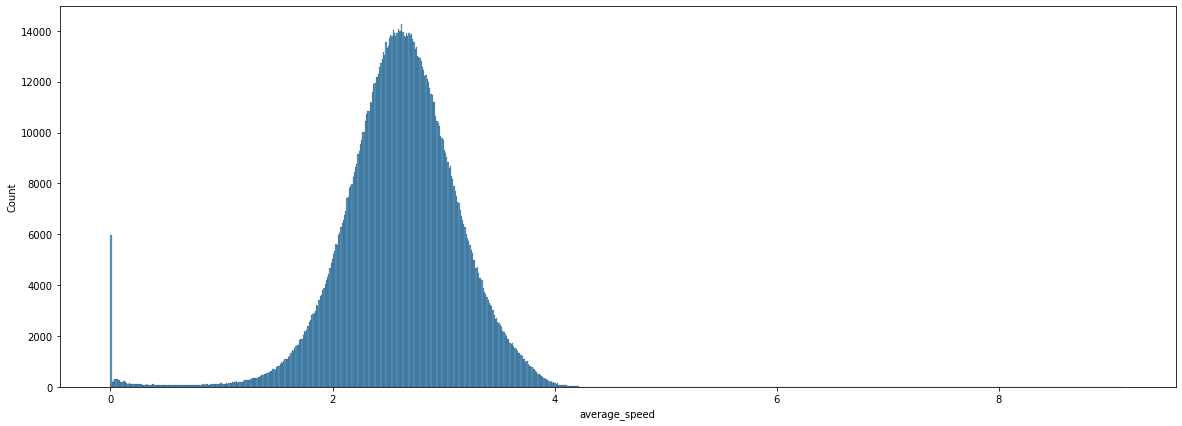

In [34]:
plt.figure(figsize=(20, 7))
sns.histplot(np.log1p(train_df['average_speed']))
plt.show()

<AxesSubplot:xlabel='vendor_id'>

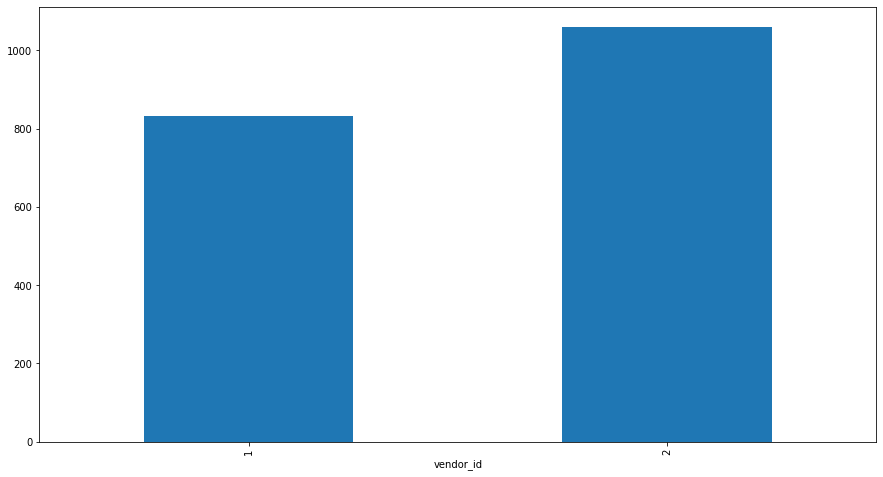

In [35]:
train_df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar', figsize=(15, 8))

Vendor 2 has significantly more trips in this data set than vendor 1 (note the logarithmic y-axis). This is true for every day of the week.

<function matplotlib.pyplot.show(close=None, block=None)>

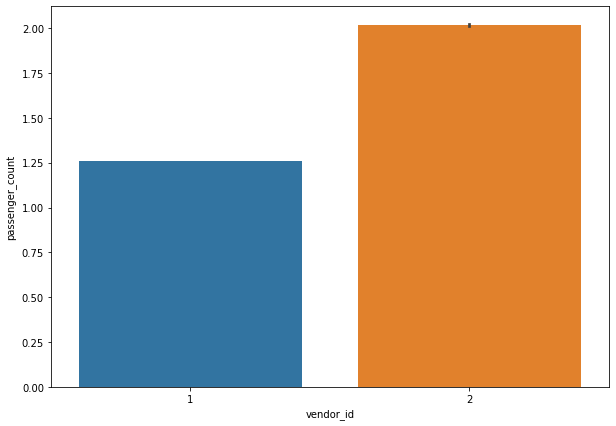

In [36]:
plt.figure(figsize=(10, 7))
sns.barplot(data=train_df, x='vendor_id', y='passenger_count')
plt.show

Most People Preferred Vendor 2 For Booking Cab Services that can lead to the Thinking part:

a)There might be either shortage of Taxi provided by vendor 1.

b)Or There might be good service Provided by Vendor B as compared to A.Lets investigate by drawing catplot.

<Figure size 1440x504 with 0 Axes>

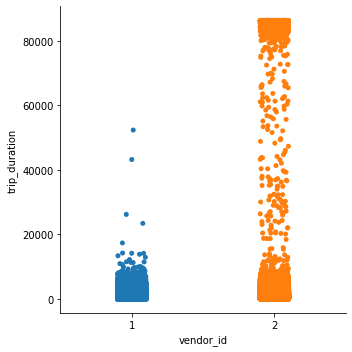

In [37]:
plt.figure(figsize=(20, 7))
sns.catplot(data=train_df, y='trip_duration', x='vendor_id')
plt.show()

Vendor 1 Offer Short Trips.Where as Vendor 2 offer short as well as long trips thats why people preferred more Vendor 2.

<Figure size 1440x504 with 0 Axes>

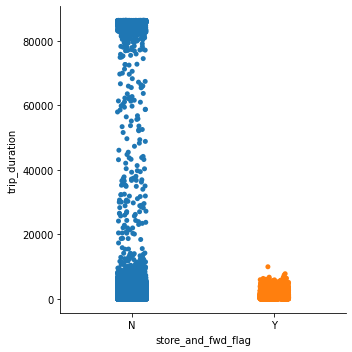

In [38]:
plt.figure(figsize=(20, 7))
sns.catplot(data=train_df, x='store_and_fwd_flag', y='trip_duration')
plt.show()

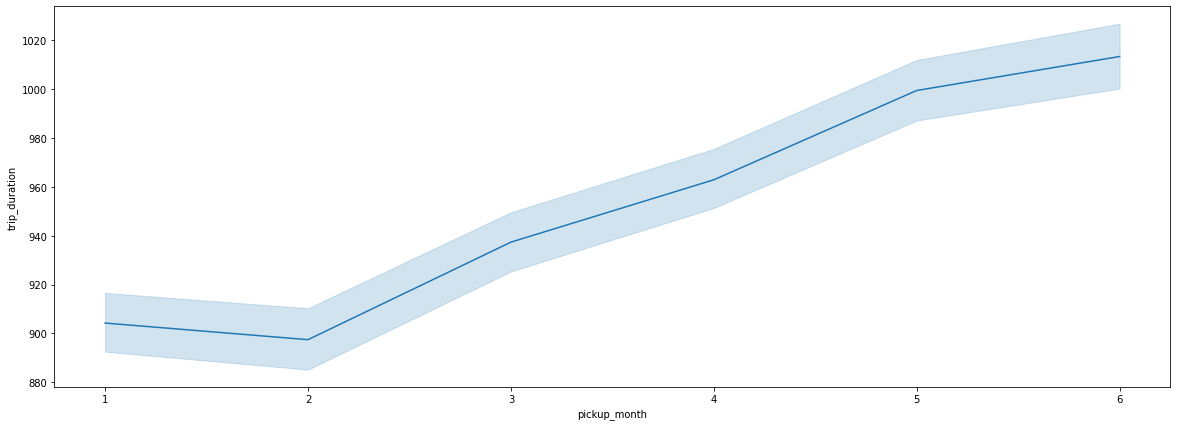

In [39]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train_df, y='trip_duration', x='pickup_month')
plt.show()

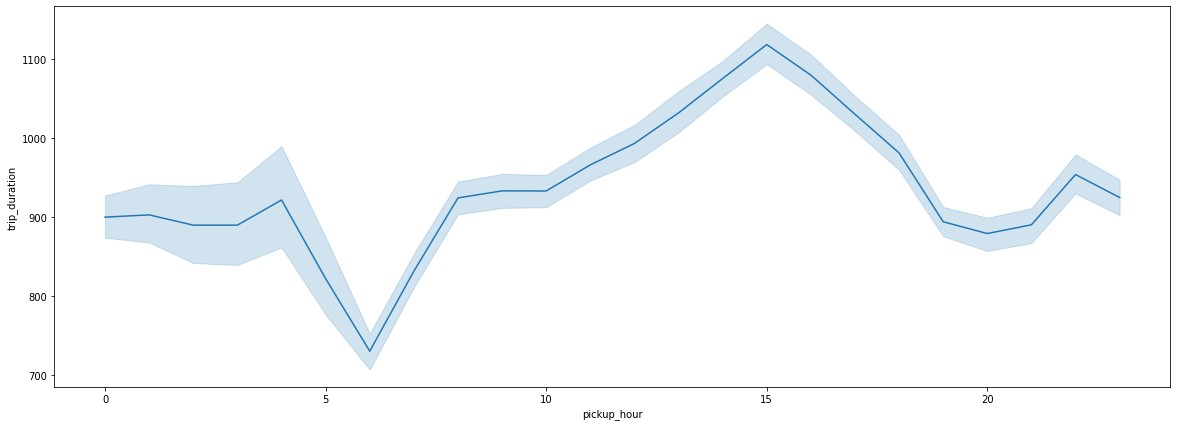

In [40]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train_df, y='trip_duration', x='pickup_hour')
plt.show()

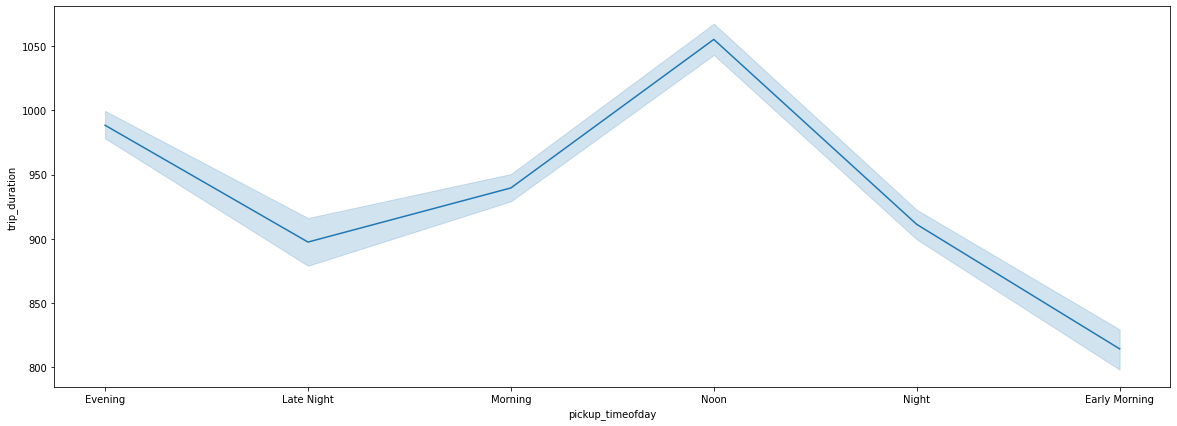

In [41]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train_df, y='trip_duration', x='pickup_timeofday')
plt.show()

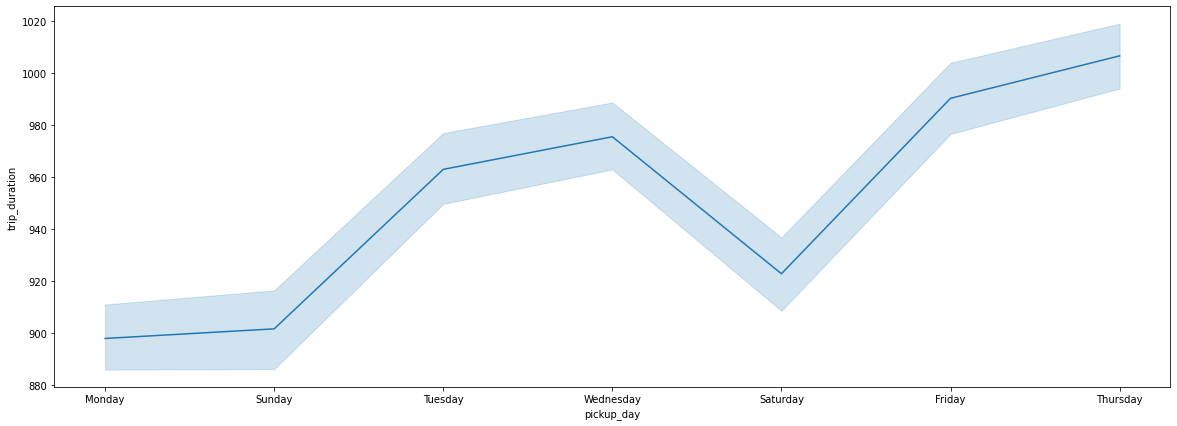

In [42]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train_df, y='trip_duration', x='pickup_day')
plt.show()

January and June have fewer trips, whereas March and April are busy months.

The weekend (Sat and Sun, plus Fri to an extend) have higher trip numbers during the early morning ours but lower ones in the morning between 5 and 10, which can most likely be attributed to the contrast between NYC business days and weekend night life. In addition, trip numbers drop on a Sunday evening/night.

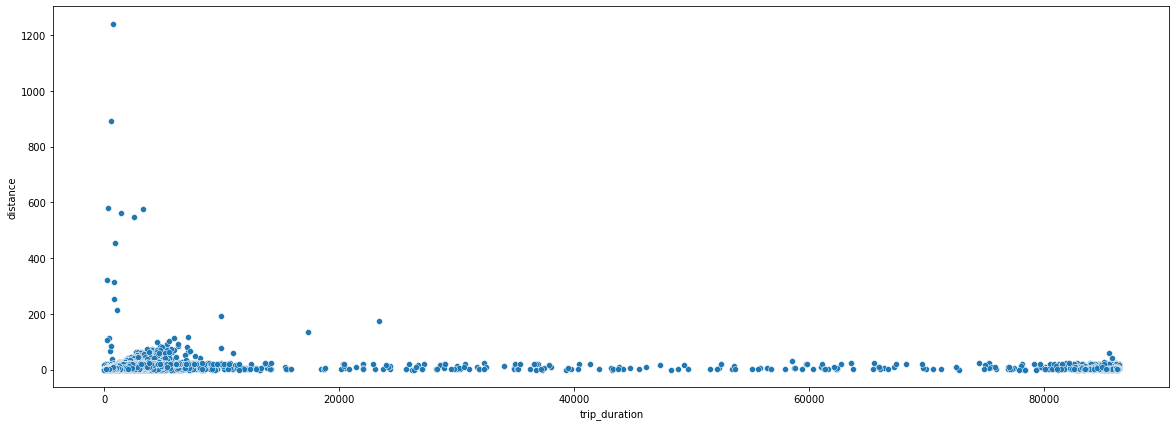

In [43]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=train_df, y='distance', x='trip_duration')
plt.show()

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

In [44]:
train_df.loc[train_df['distance']==0, :]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_weekday,dropoff_day_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timeofday,dropoff_timeofday,average_speed
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,Monday,0,0,2,2,18,18,0.0,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,Tuesday,1,1,5,5,18,18,0.0,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,Monday,0,0,5,5,23,23,0.0,Night,Night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,Monday,0,0,1,1,19,19,0.0,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,Wednesday,Wednesday,2,2,1,1,22,22,0.0,Night,Night,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,1284,Wednesday,Wednesday,2,2,2,2,8,9,0.0,Morning,Morning,0.0
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,127,Saturday,Saturday,5,5,2,2,22,22,0.0,Night,Night,0.0
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,566,Saturday,Saturday,5,5,3,3,7,7,0.0,Early Morning,Early Morning,0.0
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,632,Saturday,Saturday,5,5,4,4,20,20,0.0,Night,Night,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

One reason can be that the dropoff coordinates weren’t recorded.
Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

In [45]:
wkdy = (train_df.groupby(['vendor_id', 'pickup_day_weekday'])['trip_duration'].median())/60
wkdy

vendor_id  pickup_day_weekday
1          0                     10.466667
           1                     11.233333
           2                     11.483333
           3                     11.683333
           4                     11.383333
           5                     10.550000
           6                      9.983333
2          0                     10.533333
           1                     11.383333
           2                     11.650000
           3                     11.950000
           4                     11.466667
           5                     10.666667
           6                     10.083333
Name: trip_duration, dtype: float64

In [46]:
wkdy_ = wkdy.reset_index()
wkdy_

,vendor_id,pickup_day_weekday,trip_duration
0,1,0,10.466667
1,1,1,11.233333
2,1,2,11.483333
3,1,3,11.683333
4,1,4,11.383333
5,1,5,10.550000
6,1,6,9.983333
7,2,0,10.533333
8,2,1,11.383333
9,2,2,11.650000


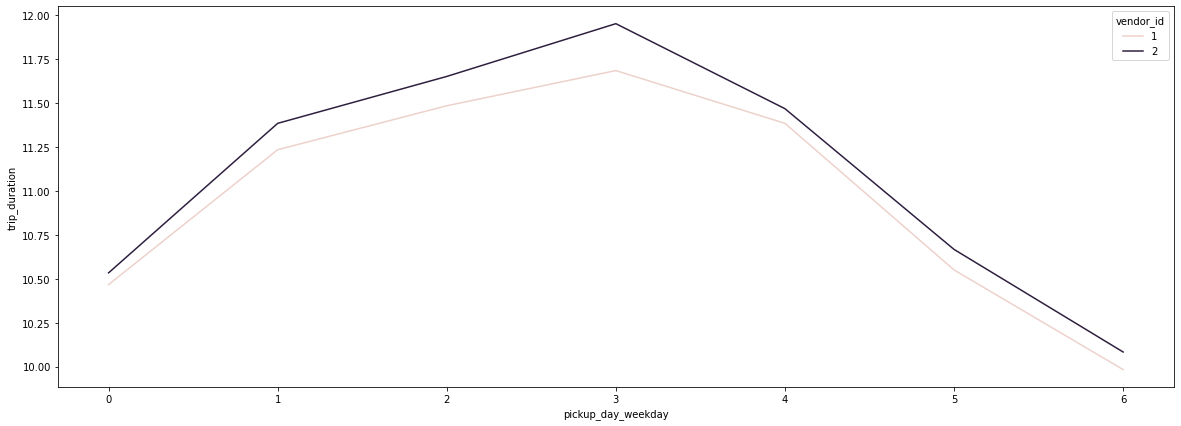

In [47]:
plt.figure(figsize=(20, 7))
sns.lineplot(x=wkdy_['pickup_day_weekday'], y=wkdy_['trip_duration'], hue=wkdy_['vendor_id'])
plt.show()

In [48]:
ph = (train_df.groupby(['vendor_id', 'pickup_hour'])['trip_duration'].median())/60
ph

vendor_id  pickup_hour
1          0              10.633333
           1              10.183333
           2               9.766667
           3               9.966667
           4               9.900000
           5               8.333333
           6               7.700000
           7               9.400000
           8              10.916667
           9              11.350000
           10             11.316667
           11             11.733333
           12             11.733333
           13             11.750000
           14             12.000000
           15             11.966667
           16             11.566667
           17             11.566667
           18             11.383333
           19             10.800000
           20             10.566667
           21             10.666667
           22             11.116667
           23             11.191667
2          0              10.883333
           1              10.266667
           2               9.933333
     

In [49]:
ph_ = ph.reset_index()
ph_

,vendor_id,pickup_hour,trip_duration
0,1,0,10.633333
1,1,1,10.183333
2,1,2,9.766667
3,1,3,9.966667
4,1,4,9.900000
5,1,5,8.333333
6,1,6,7.700000
7,1,7,9.400000
8,1,8,10.916667
9,1,9,11.350000


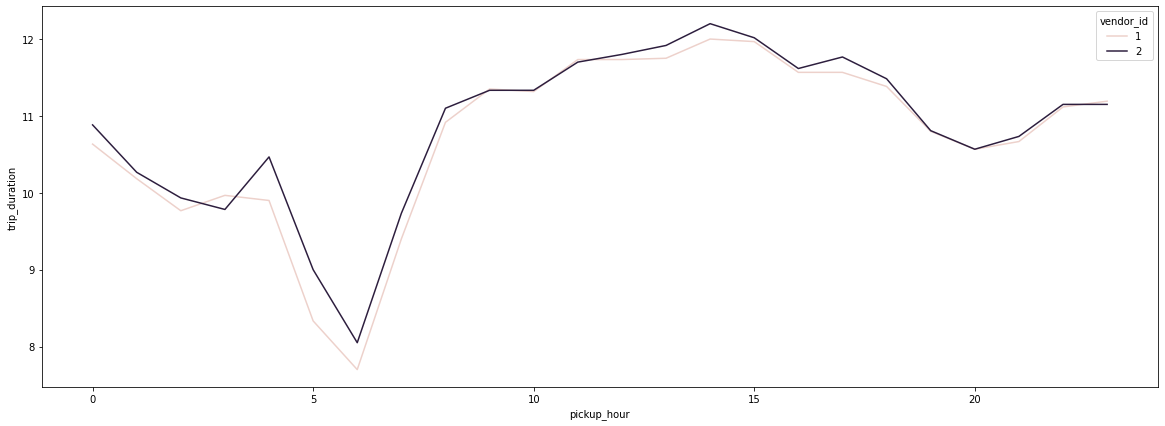

In [50]:
plt.figure(figsize=(20, 7))
sns.lineplot(x=ph_['pickup_hour'], y=ph_['trip_duration'], hue=ph_['vendor_id'])
plt.show()

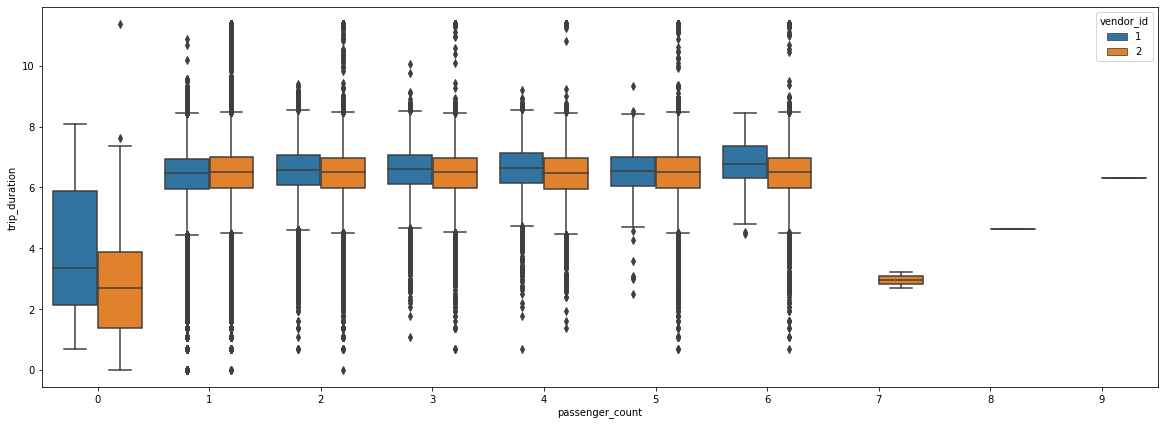

In [74]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train_df, x='passenger_count', y=np.log(train_df['trip_duration']), hue='vendor_id')
plt.show()

In [52]:
train_df.groupby('vendor_id')['trip_duration'].mean()

vendor_id
1     831.079876
2    1058.643164
Name: trip_duration, dtype: float64

In [53]:
train_df.groupby('vendor_id')['trip_duration'].std()

vendor_id
1     659.675138
2    4289.286883
Name: trip_duration, dtype: float64

In [54]:
train_df[(train_df['trip_duration']/3600 > 22) & (train_df['trip_duration']/3600 < 24)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_weekday,dropoff_day_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timeofday,dropoff_timeofday,average_speed
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594,Saturday,Sunday,5,6,2,2,4,3,2.992817,Early Morning,Late Night,0.127363
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,Saturday,Sunday,5,6,5,5,18,18,1.176094,Evening,Evening,0.049147
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352,Tuesday,Wednesday,1,2,6,6,12,12,4.366104,Noon,Noon,0.182022
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,Saturday,Sunday,5,6,2,2,0,0,1.859416,Late Night,Late Night,0.077623
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197,Friday,Saturday,4,5,3,3,11,11,2.144412,Morning,Morning,0.090612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454858,id2743253,2,2016-06-23 16:04:53,2016-06-24 16:01:33,1,-74.008759,40.719040,-73.972305,40.749691,N,86200,Thursday,Friday,3,4,6,6,16,16,4.588021,Evening,Evening,0.191611
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233,Monday,Tuesday,0,1,2,2,19,19,1.338292,Evening,Evening,0.055870
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311,Wednesday,Thursday,2,3,6,6,16,16,0.725878,Evening,Evening,0.030631
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314,Tuesday,Wednesday,1,2,2,2,11,11,1.673445,Morning,Morning,0.069796


In [55]:
train_df[(train_df['trip_duration']/3600 < 0.366)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_weekday,dropoff_day_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timeofday,dropoff_timeofday,average_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,3,3,17,17,1.498521,Evening,Evening,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,6,6,0,0,1.805507,Late Night,Late Night,9.803659
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,4,4,19,19,1.485498,Evening,Evening,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,3,3,13,13,1.188588,Noon,Noon,9.836594
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,Saturday,Saturday,5,5,1,1,22,22,1.098942,Night,Night,8.930458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,4,4,13,13,1.225080,Noon,Noon,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,6,6,1,1,7,7,6.049836,Early Morning,Early Morning,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,4,4,6,7,7.824606,Early Morning,Early Morning,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,1,1,15,16,1.092564,Noon,Evening,10.544853


In [56]:
train_df[(train_df['trip_duration']/3600 == 0)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_weekday,dropoff_day_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timeofday,dropoff_timeofday,average_speed


In [64]:
med = train_df.groupby(['pickup_day', 'vendor_id'])['trip_duration'].median()

In [67]:
med = med.reset_index()
med

,index,pickup_day,vendor_id,trip_duration
0,0,Friday,1,683.0
1,1,Friday,2,688.0
2,2,Monday,1,628.0
3,3,Monday,2,632.0
4,4,Saturday,1,633.0
5,5,Saturday,2,640.0
6,6,Sunday,1,599.0
7,7,Sunday,2,605.0
8,8,Thursday,1,701.0
9,9,Thursday,2,717.0


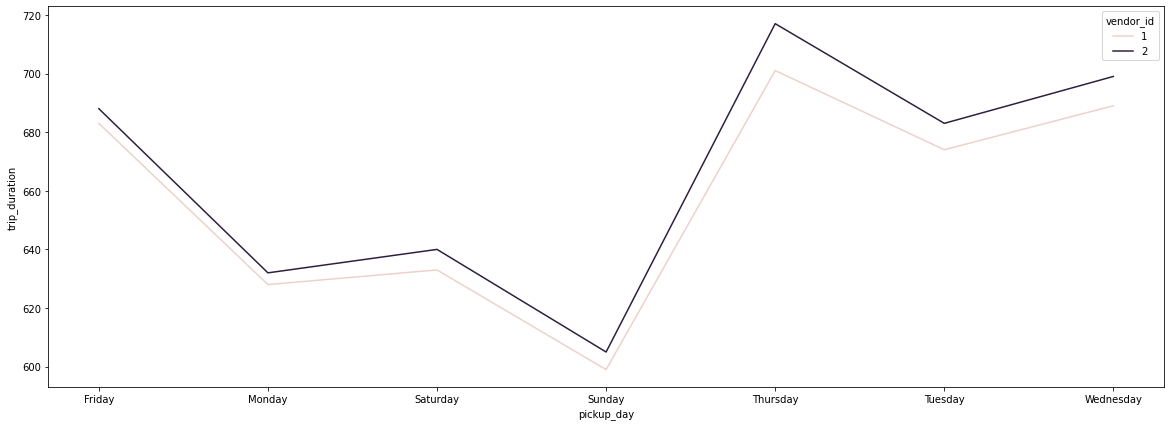

In [69]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=med, x='pickup_day', y='trip_duration', hue='vendor_id')
plt.show()

In [70]:
med = train_df.groupby(['pickup_hour', 'vendor_id'])['trip_duration'].median()

In [71]:
med = med.reset_index()
med

,pickup_hour,vendor_id,trip_duration
0,0,1,638.0
1,0,2,653.0
2,1,1,611.0
3,1,2,616.0
4,2,1,586.0
5,2,2,596.0
6,3,1,598.0
7,3,2,587.0
8,4,1,594.0
9,4,2,628.0


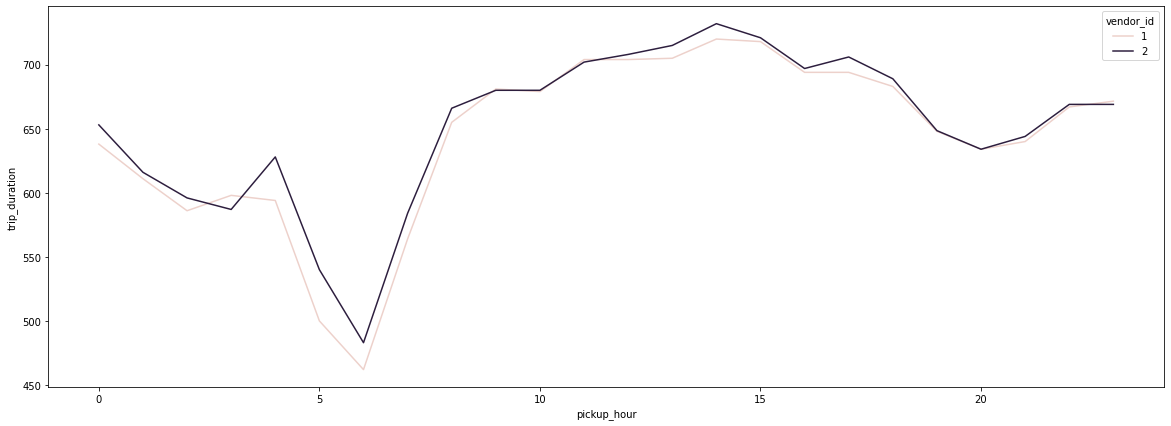

In [72]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=med, x='pickup_hour', y='trip_duration', hue='vendor_id')
plt.show()

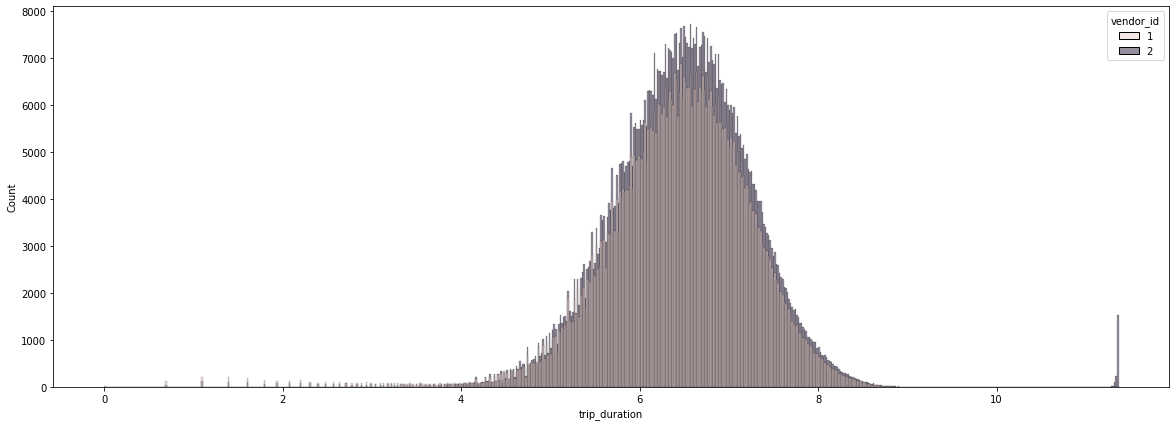

In [77]:
plt.figure(figsize=(20, 7))
sns.histplot(data=train_df, x=np.log(train_df['trip_duration']), hue='vendor_id')
plt.show()

In [79]:
train_df.groupby('vendor_id')['store_and_fwd_flag'].value_counts()

vendor_id  store_and_fwd_flag
1          N                     670293
           Y                       8045
2          N                     780302
Name: store_and_fwd_flag, dtype: int64

In [80]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_weekday,dropoff_day_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,pickup_timeofday,dropoff_timeofday,average_speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,3,3,17,17,1.498521,Evening,Evening,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,6,6,0,0,1.805507,Late Night,Late Night,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,1,1,11,12,6.385098,Morning,Noon,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,4,4,19,19,1.485498,Evening,Evening,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,3,3,13,13,1.188588,Noon,Noon,9.836594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,4,4,13,13,1.225080,Noon,Noon,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,6,6,1,1,7,7,6.049836,Early Morning,Early Morning,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,4,4,6,7,7.824606,Early Morning,Early Morning,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,1,1,15,16,1.092564,Noon,Evening,10.544853


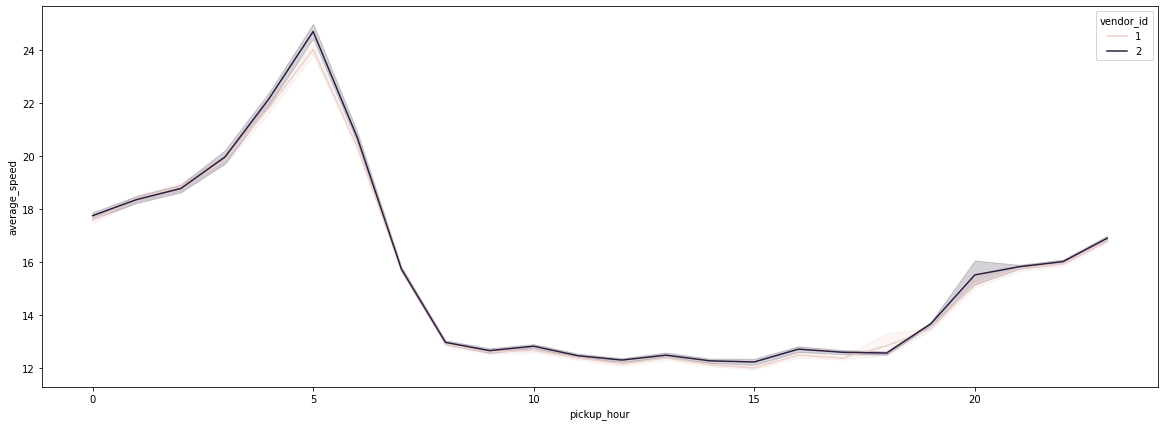

In [82]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train_df, x='pickup_hour', y='average_speed', hue='vendor_id')
plt.show()